# Fisher's Iris Data Set

***

![Iris](https://camo.githubusercontent.com/e7323e044d6625c91a344232b5f5da9127e16e640974fdfd33a52f85fc7dbb2c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67)

This notebook contains my analysis of the Fisher's Iris dataset.

The data set is available [here](https://archive.ics.uci.edu/dataset/53/iris) 

**Author: Brianne McGrath**

# Imports 

***

We use pandas for the DataFrame data structure. We use matplotlib for data visualistation. 

In [46]:
#Importing Necessary Libararies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Data

***

Load the Fisher's Iris data set.

In [47]:
df = pd.read_csv('iris.data')

In [48]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Program Needs To: (DELETE THIS TEXT AFTER)
1. Outputs a summary of each variable to a single text file - can't see the headings?? 
2. Saves a histogram of each variable to png files, and 
3. Outputs a scatter plot of each pair of variables
4. Performs any other analysis you think is appropriate 

# Summary of Each Variable

***

In [50]:
#Summary of Each Variable: 

#Calculating summary statistics for each variable
summary = df.describe()

#Format the summary information
summary_text = summary.to_string()

#Write the summary to a text file
with open("variable_summary.txt", "w") as file:
    file.write(summary_text)
print("Summary of variables written to 'variable_summary.txt' file.")

Summary of variables written to 'variable_summary.txt' file.


# Histogram of Each Variable

***

In [51]:
##COME BACK TO THIS - NOT SURE WHERE IT'S SAVING OR IF IT'S WORKING: SEARCH ONLINE FOR TROUBLESHOOTING

def save_histograms(df, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each column in the dataframe
    for column in df.columns:
        # Plotting histogram
        plt.figure()
        df[column].plot(kind='hist', bins=20, title=column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Save plot to a PNG file
        filename = f'{column}_histogram.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath)
        plt.close()
        print(f"Saved histogram of '{column}' to '{filepath}'")

# Scatter Plot of Each Variable

***

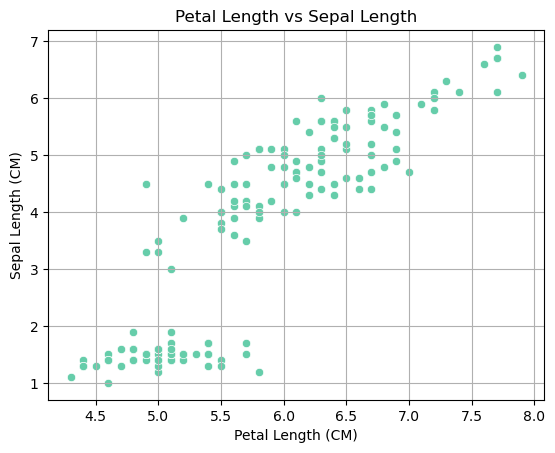

In [52]:
#Scatter Plots 

sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=df, color='mediumaquamarine')
plt.title('Petal Length vs Sepal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Sepal Length (CM)')
plt.grid()
plt.show()
        

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


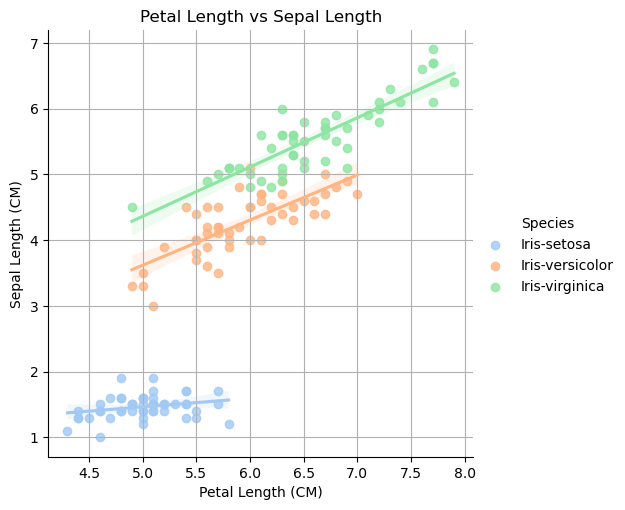

In [56]:
# lmplot seperated by Species

sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df, hue='Species', palette='pastel')
plt.title('Petal Length vs Sepal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Sepal Length (CM)')
plt.grid()
plt.show()